In [160]:
# The dataset shows monthly property transactions (MPT) throught the United Kingdom. This dataset looks at monthly property 
# transactions completed in the UK with value of £40,000 or above.

#I will be analysing the data and showing my findings
# in graphs, visualising the datatset.

#What i will be finding in my analysis:
# Analysing trends each year to identify patterns.
# Comparing yearly transactions to identify growths and declines.
# grouping transactions by regions to see which has the most or least transactions
# I will be making predictions using linear regression, i will the present my findings in a viusal form such as seaborn, bar plot, scatter plot, and matrix confusion. 

#Reference:
#All data has been sourced from the goverment website
# link: https://assets.publishing.service.gov.uk/media/66f17eccbd3aced9da489c15/MPT_Tab_Sep_24.ods

In [162]:
# Importing necessary libraries for this project.

import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from matplotlib import pyplot as plt

In [164]:
# Saving the datatset to a dataframe.
df = pd.read_csv('MPT_Tab_Sep_24.csv')

In [166]:
# Printing first 5 rows of the data.

df.head()

,Month and year,England,Scotland,Wales,Northern Ireland,UK,UK (seasonally adjusted)
0,April 2005,"88,840","10,540","4,520","3,290","107,190","109,680"
1,May 2005,"91,030","10,180","4,540","3,260","109,010","110,270"
2,June 2005,"103,700","12,120","5,050","3,790","124,660","112,460"
3,July 2005,"107,770","12,530","5,160","3,710","129,170","113,610"
4,August 2005,"107,040","12,000","5,200","3,910","128,150","115,470"


In [168]:
# Exploring the dataset using functions like shape, head(), describe(), and dtypes() to understand its structure.

df.shape

(262, 7)

In [170]:
df.describe()

,Month and year,England,Scotland,Wales,Northern Ireland,UK,UK (seasonally adjusted)
count,234,233,233,233,233,233,233
unique,234,229,208,170,151,232,227
top,April 2005,"87,040","6,830","3,430","1,720","91,270","106,250"
freq,1,2,3,4,5,2,2


In [172]:
df.dtypes

Month and year              object
England                     object
Scotland                    object
Wales                       object
Northern Ireland            object
UK                          object
UK (seasonally adjusted)    object
dtype: object

In [174]:
df.tail()

,Month and year,England,Scotland,Wales,Northern Ireland,UK,UK (seasonally adjusted)
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
df.isnull().sum().sum()

202

In [178]:
# indetifying missing values

In [180]:
#the spreadsheet for this data has empty rows, I will clean this up.
df = df.drop(df.index[233:261])

In [182]:
#confrim changes
df.tail()

,Month and year,England,Scotland,Wales,Northern Ireland,UK,UK (seasonally adjusted)
229,May 2024,"77,380","9,240","3,910","2,170","92,700","91,840"
230,June 2024 [provisional],"75,860","8,760","3,990","2,020","90,630","91,250"
231,July 2024 [provisional],"81,730","8,940","4,280","1,990","96,940","90,610"
232,August 2024 [provisional estimates],"87,430","9,860","4,520","2,520","104,330","90,210"
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df = df.dropna()

In [187]:
df.isnull().sum().sum()

0

In [189]:
# I will be analysing transactions from years 2005 - 2010 in England region.

ten_years = df.loc[:70][['Month and year', 'England', 'UK (seasonally adjusted)']]

In [191]:
ten_years_grouped = ten_years.groupby('Month and year').sum().reset_index()

In [193]:
ten_years_grouped_int = ten_years_grouped.head(29)

In [195]:
ten_years_grouped_int.head(20)

,Month and year,England,UK (seasonally adjusted)
0,April 2005,"88,840","109,680"
1,April 2006,"101,830","135,880"
2,April 2007,"105,780","136,980"
3,April 2008,"73,130","94,610"
4,April 2009,"48,840","62,120"
5,April 2010,"60,830","75,280"
6,August 2005,"107,040","115,470"
7,August 2006,"132,180","142,280"
8,August 2007,"136,790","137,040"
9,August 2008,"57,810","61,820"


In [197]:

# Convert numeric columns to integers, removing commas, and handle non-numeric entries ( missing values as NaN)
columns_to_convert = ['England', 'Scotland', 'Wales', 'Northern Ireland', 'UK', 'UK (seasonally adjusted)']

# Remove commas and convert columns to numeric, setting errors='coerce' to handle any non-numeric values as NaN
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')




In [199]:
# Convert 'Month and year' to a datetime format for easier time-based analysis
df['Month and year'] = pd.to_datetime(df['Month and year'], errors='coerce')

# Displaying the cleaned data 
df.head(), df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month and year            230 non-null    datetime64[ns]
 1   England                   233 non-null    int64         
 2   Scotland                  233 non-null    int64         
 3   Wales                     233 non-null    int64         
 4   Northern Ireland          233 non-null    int64         
 5   UK                        233 non-null    int64         
 6   UK (seasonally adjusted)  233 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 22.7 KB


C:\Users\Owner\AppData\Local\Temp\ipykernel_11528\1537839793.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month and year'] = pd.to_datetime(df['Month and year'], errors='coerce')


(  Month and year  England  Scotland  Wales  Northern Ireland      UK  \
 0     2005-04-01    88840     10540   4520              3290  107190   
 1     2005-05-01    91030     10180   4540              3260  109010   
 2     2005-06-01   103700     12120   5050              3790  124660   
 3     2005-07-01   107770     12530   5160              3710  129170   
 4     2005-08-01   107040     12000   5200              3910  128150   
 
    UK (seasonally adjusted)  
 0                    109680  
 1                    110270  
 2                    112460  
 3                    113610  
 4                    115470  ,
 None)

In [201]:
# Visualising the whole data to identify trends 

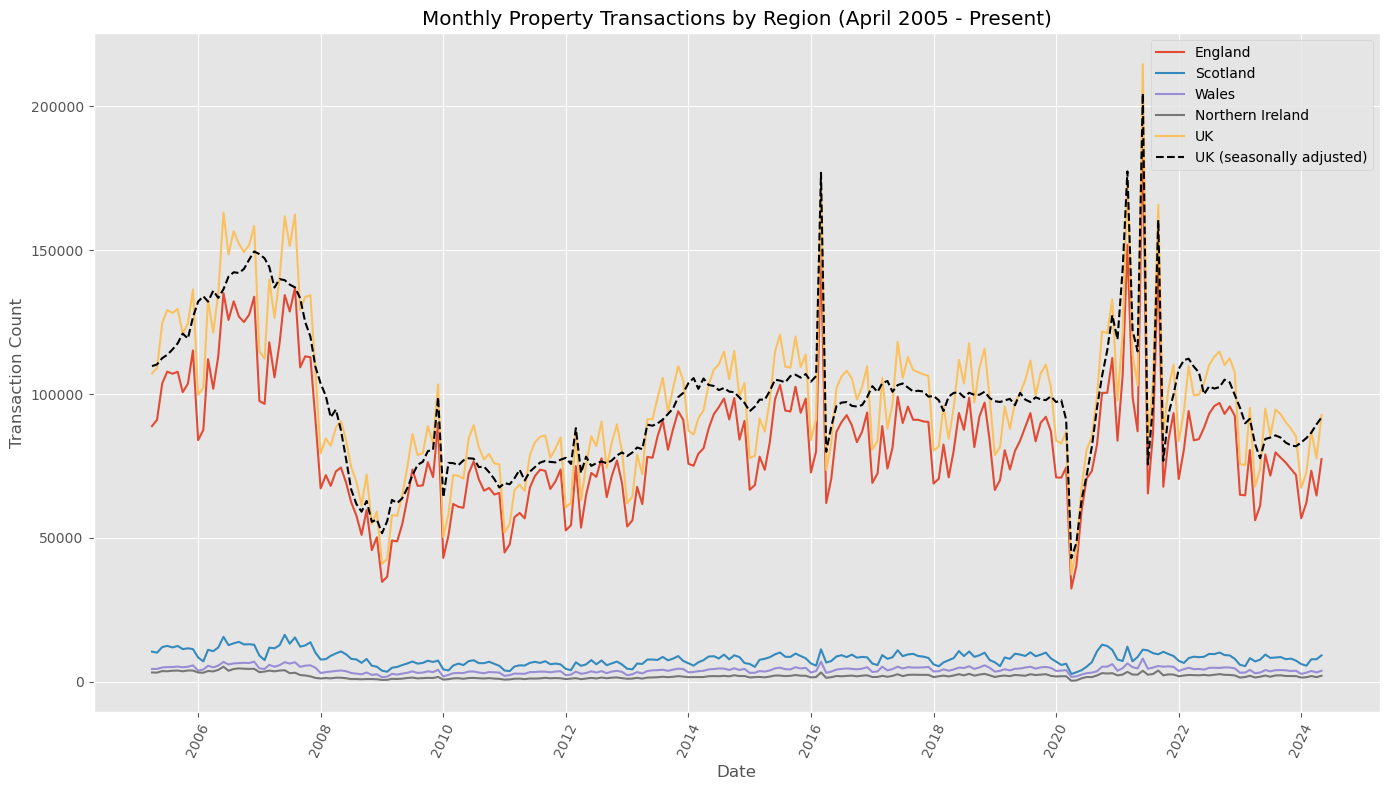

In [203]:
# Adjusting the plot style to a Matplotlib style called ggplot
plt.figure(figsize=(14, 8))
plt.style.use('ggplot') 

# Plotting each region's monthly transaction df
for region in ['England', 'Scotland', 'Wales', 'Northern Ireland', 'UK']:
    plt.plot(df['Month and year'], df[region], label=region)

# Plotting the seasonally adjusted UK df
plt.plot(df['Month and year'], df['UK (seasonally adjusted)'], label='UK (seasonally adjusted)', linestyle='--', color='black')

# Adding titles and labels
plt.title('Monthly Property Transactions by Region (April 2005 - Present)')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.xticks(rotation=65)
plt.tight_layout()

plt.show()


In [205]:
# The graph shows visible fluctuations in transactions between 2020-2022

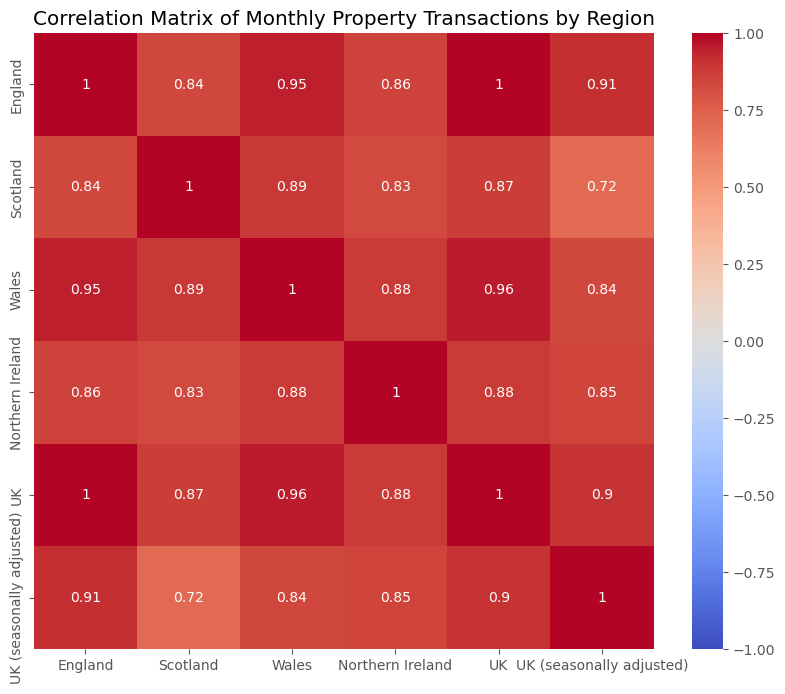

In [207]:
import seaborn as sns

# Calculating the correlation matrix for the numeric columns
correlation_matrix = df[['England', 'Scotland', 'Wales', 'Northern Ireland', 'UK', 'UK (seasonally adjusted)']].corr()

# Setting up the plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# titles and labels
plt.title('Correlation Matrix of Monthly Property Transactions by Region')
plt.show()


In [209]:
#correlation analysis assesses how transaction counts in different regions 
#(England, Scotland, Wales, and Northern Ireland) relate to each other, 
#as well as to the UK totals (UK seasonally adjusted). 
#This has revealed certain regions' transaction volumes tend to rise and 
#fall together, suggesting inter-regional economic ties or shared factors affecting 
#property transactions.

In [211]:
#Experimenting with Linear Regression algorithms for predictions of
# MAE, MSE, RMSE, AND R**

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[['England', 'Scotland', 'Wales', 'Northern Ireland']]  
y = df['UK']   


In [213]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialising and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [215]:
# Testing predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [217]:
# Printing the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1.3003839140242718e-11
Mean Squared Error (MSE): 2.3428570881501925e-22
Root Mean Squared Error (RMSE): 1.530639437669823e-11
R-squared (R²): 1.0
